# Color Identification in Images (Computer vision)

Made by- Tamanpreet Singh

## READING LIBRARIES

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# IMPORTING IMAGE

The type of this input is <class 'numpy.ndarray'>
Shape: (2157, 3408, 3)


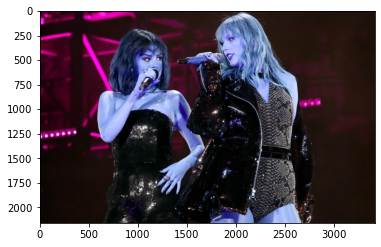

In [2]:
imgName = ('C:/Users/hp/Desktop/i.jpg')
image = cv2.imread(imgName)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

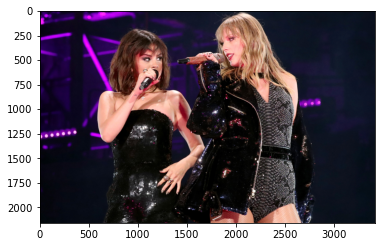

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

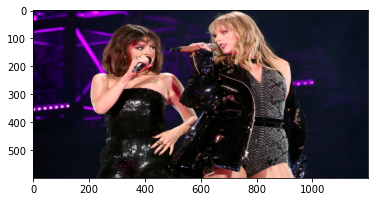

In [4]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# COLOR IDENTIFICATION
FIRST, WE WILL DEFINE A FUNCTION THAT CAN GIVE US THE HEX VALUES OF OUR THE COLORS THAT WE WILL IDENTIFY

In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Clusters of colors are identified and arranged in the correct order.
So we plot the colors as a PIE CHART

In [6]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([54.19430228, 36.22797065, 34.93821299]),
 array([127.71431444, 117.93124246, 120.26497789]),
 array([15.10078028, 17.65110928, 33.04467144]),
 array([219.76318862, 164.80012738, 146.64334996]),
 array([149.01282297,  81.08937799,  67.52478469]),
 array([ 98.45350543,   4.68876503, 150.36432972]),
 array([194.16987179,   9.5952381 , 235.59569597]),
 array([191.06420258, 126.76109477, 106.51400435]),
 array([30.42715526, 11.66871426, 62.30823978]),
 array([8.1858144 , 7.4624124 , 8.51698874]),
 array([247.43561873, 194.91304348, 180.00789669]),
 array([86.07298607, 66.41813043, 66.24399354])]

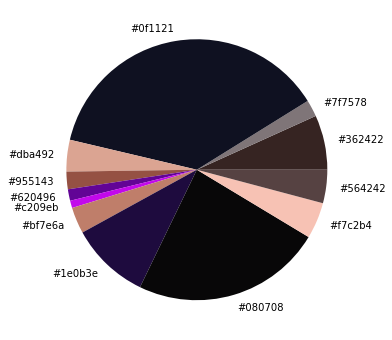

In [8]:
get_colors(get_image(imgName), 12, True)

In [10]:
print("Thank you!!") 

Thank you!!
